# PC lab 13: PyTorch & Convolutional Neural Networks 
----

<img src="img/school_chop.jpg" style="width:100%">

## Introduction

Convolutional neural networks caused a major step forward in the performance of image recognition. These networks are mostly identical to standard neural networks, in which features are first learned through multiple (layers of) convolutions. Obtained features are subsequently used as the input for a standard neural network, often performing a classification problem.

### Convolution

A convolution is the iteration of a kernel with size $ M \times N $ over a given input $ \textbf{X} $, performing a 2D linear combination of the weights $ W $  of the kernel with the overlapping area of the input. For a normal convolution with single striding and no padding, the output $ y_{ij} $ is equal to:

$$ y_{ij} = \sum_{a=0}^{m-1} \sum_{b=0}^{n-1} W_{ab} x_{(i+a)(j+b)} $$

During a convolution, the kernels slides over the input image to obtain a new image of outputs. The stride of a kernel defines the horizontal and vertical stepsize during iteration. Input data can be padded with multiple layers of a zero-filled border, increasing the output dimensions.

**convolution step with M,N = 3; stride = 2 and padding layer of 1**
<img src="img/kern_mult.gif">

**several other examples. An extended explanation on all types of convolutions can be found [here](https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d)**
<img src="img/conv_ex_all.gif">

## Convolutional neural network

A convolutional neural network usually processes the image with **multiple sequential convolutions**. For each layer, the kernel is evaluated for **all channels** of the input data. It is important to understand that the output depth is correlated to the amount of different kernels, or features, every node has been initialized with. The kernel, although often depicted as only evaluating one layer, actually takes **the sum of all layers (channels)** to obtain an output.

<img src="img/conv_ex_3.gif" style="width:100%">

<img src="img/conv_schema.jpg" style="width:100%">

A classic example of a convolutional neural network applies an activation function (e.g. **ReLU**) on the output of every convolutional layer, after which the activation signals are **maximum pooled**. Maximum pooling can reduces the amount of parameters present in a neural network, which reduces overfitting and computational burden. Maximum pooling is also initialized with specific arguments such as kernel size, stride and padding.

<img src="img/max_pool.png">

The last layers of every convolutional neural netwerk always consist of several fully connected layers. The mathematical description of these layers were discussed in the previous PC lab. One can interpret the convolutional layers as the section of the netwerk in which features training is done (edges, contours, contrasts,...). These are used as inputs for the fully connected neural netwerk, which combines these features to train the classifier.

**The softmax function** takes the n-dimensional output of the model and rescales these values to probabilities that sum up to one. It is typically used as the output layer for multiclass classification.

$$ \sigma(\hat{y})_j = \frac{e^{\hat{y}_j}}{\sum_{k=1}^{K} e^{\hat{y}_k}} $$

<hr>
<img src="img/pytorch.png" style="width:40%;float:left">

PyTorch is a python package that provides two high-level features:

- Tensor computation (like numpy) with **strong GPU acceleration**
- **Deep Neural Networks** built on a tape-based autograd system


<div class="alert alert-warning">
    <h2>Installing PyTorch</h2>
    <p>Run from terminal. In the same environment as scikit learn has been installed.</p>
    <p>install on <b>LINUX</b>:</p>
    <code>conda install pytorch-cpu torchvision-cpu -c pytorch</code>
    <p>install on <b>WINDOWS</b>:</p>
    <code>conda install pytorch-cpu -c pytorch
    pip3 install torchvision</code>
    <p>install on <b>MAC</b>:</p>
    <code>conda install pytorch torchvision -c pytorch</code>
</div>

In [1]:
import numpy as np
import torch

Torch can be approached in a similar way as numpy, where data is mainly exchanged through **Tensor** objects instead of **numpy** objects. 

In [2]:
torch.zeros(4,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


Switching between numpy arrays and tensors is easy:

In [3]:
torch.zeros(4,3).numpy()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [4]:
torch.from_numpy(np.zeros((4,3)))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

<div class="alert alert-warning">
    <h2>INFO</h2>
    <p>PyTorch has many functions and objects that behave similar to the ones found in the numpy module. </p>
    <ul>
        <li><code>torch.zeros()</code></li>
        <li><code>torch.ones()</code></li>
        <li><code>torch.arange()</code></li>
        <li><code>torch.Tensor.min()</code></li>
        <li><code>torch.Tensor.shape</code></li>
        <li>...</li>
    </ul>
</div>

----

<div class="alert alert-info">
    <h1>Structure of the exercises.</h1>
    <p>During this PC-lab you will be introduced with an examplory workflow when training a predictive model for image recognition. More specifically, we will create a <b>convolutional neural network</b> to <b>recognize vehicles from animals</b> using the <b>CIFAR-10</b> dataset in <b>PyTorch</b>. Most of the code has been written out already, leaving time to build further upon the existing codebase to improve results or add interesting features.
   
</div>

----

## 1. Data loading and preprocessing

<img src="img/CIFAR10.jpg" width='25%' align="right">

# CIFAR-10

- 60000 $32 \times 32$ colour images
- 50000 training images + 10000 validation images
- 10 classes $\rightarrow$ 6000 images per class


Collected for **MSc thesis** 

<ul>
<a href="learning-features-2009-TR.pdf">Learning Multiple Layers of Features from Tiny Images</a>, Alex Krizhevsky, 2009.
</ul>

The **CIFAR-10** is next to **MNIST** an established computer-vision dataset which has been extensively used to evaluate the performance of a wide variety machine learning techniques. A list featuring some papers using CIFAR-10 can be found [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#CIFAR-10). To load the CIFAR-10 dataset into our environment, we can use the pytorch module. 

In [5]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

validationset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

validation_loader = torch.utils.data.DataLoader(validationset, batch_size=32,
                                         shuffle=False, num_workers=2)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

binary_classes = np.array(['vehicle', 'animal'])

Files already downloaded and verified
Files already downloaded and verified


## 2. Building the network

Neural networks are initialized through the use of class objects. Many of the functionalities necessary to create [**all types of neural networks**](http://www.asimovinstitute.org/neural-network-zoo/) have [**already been implemented**](http://pytorch.org/docs/master/nn.html). The following code creates a neural network with two convolutions and two fully connected layers. The network is identical to the neural net shown at the beginning of the notebook (with the car displayed), albeit with the addition of one fully connected layer.

<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p>Calculate the input nodes of the the first fully connected layer <code>self.fc1</code>. This is the first argument of the function <code>nn.Linear()</code>. The batch size does not influence this value. Notice that <code>x.view(-1, ...)</code> assigns the different batches to the first dimension.</p>
</div>

In [6]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 3 input image channels, 16 output channels, 5x5 square convolution
        self.conv1 = nn.Conv2d(3, 16, (5,5))
        # 16 input image channels, 32 output channels, 5x5 square convolution
        self.conv2 = nn.Conv2d(16, 32, (5,5))
        
        # --- SOLUTION
        self.fc1 = nn.Linear(32 * 5 * 5, 64)
        # --- SOLUTION     
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        # Max pooling over a (2, 2) window + RELU
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # Max pooling over a (2, 2) window + RELU
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # Flatten array 
        # --- SOLUTION
        x = x.view(-1, 32*5*5)
        # --- SOLUTION
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Notice the similarities between the creation of this neural network and the one created in the previous lab. To be able to call a variant of this network, we can choose to add parameter values to `def __init__(self, .....)`, such as kernel sizes, or the total amount of nodes in each fully connected layer.

### Backpropagation

Pytorch offers an easy way to obtain gradients, where no explicit calculation of the derivatives is required. This is done through `autograd.Variable`.

<div class="alert alert-warning">
    <p><code>autograd.Variable</code> is the central class of the package. It wraps a <code>Tensor</code>, and supports nearly all operations defined on it. Once you finish your computation you can call <code>.backward()</code> and have all the gradients computed automatically.</p>
    <p><code>Variable</code> and <code>Function</code> are interconnected and build up an acyclic graph, which encodes a complete history of computation. Each variable has a <code>.grad_fn</code> attribute that references a <code>Function</code> that has created the <code>Variable</code></p>
</div>

In [7]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [8]:
y = x + 2
z = y**4
out = z.mean()

In [9]:
out

tensor(81., grad_fn=<MeanBackward0>)

In [10]:
x.grad

In [11]:
out.backward()

In [12]:
x.grad

tensor([[27., 27.],
        [27., 27.]])

Switching between a Variable and Tensor is also possible

In [13]:
x = x.data
print(x)

tensor([[1., 1.],
        [1., 1.]])


In [14]:
x = Variable(x)
print(x)

tensor([[1., 1.],
        [1., 1.]])


## 3. Training the model

### Helper functions


The next step is to train the model. The train_loader and validation_loader object is used to obtain data batches of fixed size. The `fit()` function trains the model for a specified amount of epochs while storing data obtained during training with the `logger()` class. `convert_to_binary_class()` is a custom function defined to convert the dataset into a binary class problem (vehicles <-> animals). This is merely done to make training faster. To train with the original classes, simply comment out the line `y_batch = convert_to_binary_class(y_batch)` twice, as found in the `fit()` function. Furthermore, the model has to be changed to have 10 outputs. 

In [15]:
def convert_to_binary_class(y_batch):
    labels = []
    for label in y_batch:
        if label in [0,1,8,9]:
            labels.append(0)
        else:
            labels.append(1)
    
    return torch.LongTensor(labels)
       
    
def fit(model, train_loader, criterion, optimizer, log, epochs=20):
    epoch = 0   # set starting epoch
    while epoch<epochs:
        print("\nepoch {}".format(epoch))
        epoch +=1
        model.train()
        for i, data in enumerate(train_loader):   # iterate randomized batches
            optimizer.zero_grad()
            X_batch, y_batch = data
            y_batch = convert_to_binary_class(y_batch)
            X_batch, y_batch = Variable(X_batch), Variable(y_batch)
            optimizer.zero_grad()
            y_hat = model.forward(X_batch)
            loss = criterion(y_hat, y_batch)
            loss.backward()   # Calculate gradient
            optimizer.step()   # Update weights using defined optimizer
            log.log_metrics(y_batch.data.numpy(), y_hat.data.numpy(), loss.item())
            if (i%100 == 1):
                log.output_metrics()
        
        # Repeat this process for the validation dataset
        model.eval()
        for i, data in enumerate(validation_loader, 0):
            X_batch, y_batch = data
            y_batch = convert_to_binary_class(y_batch)
            X_batch, y_batch = Variable(X_batch), Variable(y_batch)
            y_hat = model.forward(X_batch)
            loss = criterion(y_hat, y_batch)
            log.log_metrics(y_batch.data.numpy(), y_hat.data.numpy(), loss.item(), validation=True)
        log.output_metrics(validation=True)
        
        

<div class="alert alert-warning">
    <h2><code>class logger()</code> </h2>
    <p><code>logger()</code> has been implemented as a convenient way to store model metrics throughout the training process.  An object of this class can be created before training and is used for calculating, storing, printing and plotting model metrics. The object does only store the metrics as defined at initialization. Feel free to add yor own metrics to the class.</p>
</div>

In [16]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline 

class logger(object):
    def __init__(self, metrics, max_i):
        self.i = [0,0]
        self.max_i = max_i
        self.log_loss, self.log_auc, self.log_acc = False, False, False
        self.metrics = {"train":{}, "validation":{}}
        if "loss" in metrics:
            self.log_loss = True 
            self.metrics["train"].update({"loss":[0]})
            self.metrics["validation"].update({"loss":[0]})
        if "AUC" in metrics:
            self.log_auc = True
            self.metrics["train"].update({"auc":[0]})
            self.metrics["validation"].update({"auc":[0]})
        if "acc" in metrics:
            self.log_acc = True
            self.metrics["train"].update({"acc":[0]})
            self.metrics["validation"].update({"acc":[0]})
        
    def log_metrics(self, y_true, y_hat, loss, validation=False):
        if validation:
            sw = 1
            sw_str = "validation"
        else:
            sw = 0
            sw_str = "train"
        self.i[sw] += 1
            
        if self.log_loss:
            update = (self.metrics[sw_str]["loss"][-1]*(self.i[sw]-1)+loss)/self.i[sw]
            self.metrics[sw_str]["loss"].append(update)

        if self.log_auc:
            auc = roc_auc_score(y_true, y_hat[:,1])
            update = (self.metrics[sw_str]["auc"][-1]*(self.i[sw]-1)+auc)/self.i[sw]
            self.metrics[sw_str]["auc"].append(update)
        if self.log_acc:
            acc = sum(y_hat.argmax(axis=1) == y_true)/len(y_true)
            update = (self.metrics[sw_str]["acc"][-1]*(self.i[sw]-1)+acc)/self.i[sw]
            self.metrics[sw_str]["acc"].append(update)
        
    def output_metrics(self, validation=False):
        data = "validation" if validation else "train"
        if validation:
            print_str = "\n{:<10s}:\t100.0%".format(data)
        else:
            print_str = "\r{:<10s}:".format(data)
            print_str += "\t{:4.2f}%".format((self.i[0]%self.max_i)/self.max_i*100)
        for k, v in self.metrics[data].items():
            print_str += "\t{}: {:5.3f}".format(k, v[-1])
        print(print_str, end = "")
                
    def plot_metrics(self):
        fig, axes = plt.subplots(len(self.metrics["train"]),
                               2, figsize=(12,6*len(self.metrics["train"])))
        for i, dict_0 in enumerate(self.metrics.items()):
            for j, dict_1 in enumerate(dict_0[1].items()):
                axes[j,i].plot(range(len(dict_1[1][1:])),dict_1[1][1:])
                axes[j,i].set_title("{} {}".format(dict_0[0], dict_1[0]))


### Training

Now that we have loaded our data, defined our convolutional neural network, and created all the functions necessary for training, the actual training process can start. For this instance, we will use the cross entropy loss to optimize our model. Notice how `nn.CrossEntropyLoss()` incorporaties the softmax function on the inputs. [Adam](http://sebastianruder.com/optimizing-gradient-descent/index.html#adam) is used to determine the step size using the gradient of the loss with respect to the weights. Adam is currently often considered the best option for this task.

In [24]:
import torch.optim as optim
from sklearn.metrics import confusion_matrix

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
log = logger(metrics=["loss","acc", "AUC"], max_i =len(train_loader))
fit(model, train_loader, criterion, optimizer, log, epochs=20)


epoch 0
train:	96.10%	loss: 0.278	auc: 0.953	acc: 0.887
test:	100.0%	loss: 0.242	auc: 0.966	acc: 0.901
epoch 1
train:	96.10%	loss: 0.248	auc: 0.962	acc: 0.900
test:	100.0%	loss: 0.230	auc: 0.969	acc: 0.906
epoch 2
train:	96.10%	loss: 0.230	auc: 0.967	acc: 0.908
test:	100.0%	loss: 0.218	auc: 0.971	acc: 0.912
epoch 3
train:	96.10%	loss: 0.217	auc: 0.970	acc: 0.914
test:	100.0%	loss: 0.210	auc: 0.973	acc: 0.916
epoch 4
train:	96.10%	loss: 0.206	auc: 0.973	acc: 0.918
test:	100.0%	loss: 0.202	auc: 0.974	acc: 0.919
epoch 5
train:	96.10%	loss: 0.196	auc: 0.975	acc: 0.923
test:	100.0%	loss: 0.198	auc: 0.975	acc: 0.920
epoch 6
train:	96.10%	loss: 0.186	auc: 0.977	acc: 0.927
test:	100.0%	loss: 0.194	auc: 0.976	acc: 0.922
epoch 7
train:	96.10%	loss: 0.178	auc: 0.979	acc: 0.930
test:	100.0%	loss: 0.193	auc: 0.976	acc: 0.924
epoch 8
train:	96.10%	loss: 0.169	auc: 0.981	acc: 0.933
test:	100.0%	loss: 0.193	auc: 0.977	acc: 0.925
epoch 9
train:	96.10%	loss: 0.161	auc: 0.982	acc: 0.937
test:	100.0%	los

## 4. Evaluating the model

### Metrics

After training we can plot saved metrics using the `logger.plot_metrics()` function. 

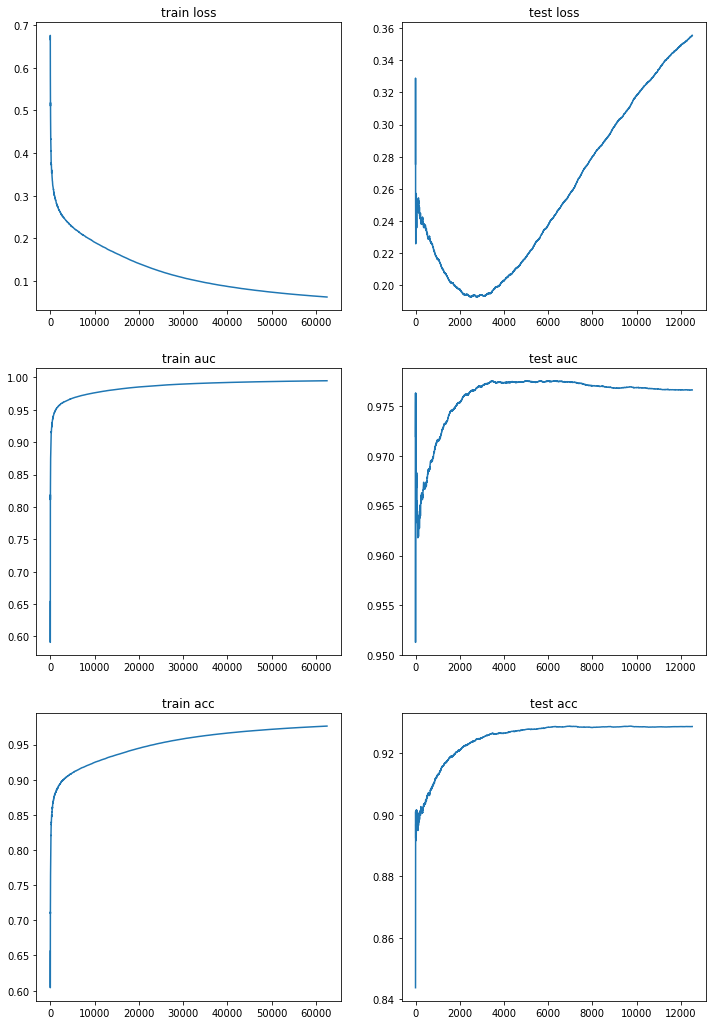

In [25]:
log.plot_metrics()

<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p><b>Evaluate</b> the metrics after 15-20 epochs. Should the model train longer?</p>
</div>

<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p><b>Try</b> different optimizer functions and compare the different loss curves?</p>
</div>

### Confusion matrix

<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p><b>Write out </b> some code to obtain the confusion matrix of the predictions on the validation data.</p>
</div>

In [29]:
# We first load all data in two arrays

y_hat_all = []
y_true_all = []
for i, data in enumerate(testloader, 0):
    X_batch, y_batch = data
    y_batch = convert_to_binary_class(y_batch)
    X_batch, y_batch = Variable(X_batch), Variable(y_batch)
    y_hat = model.forward(X_batch)
    y_hat_all.append(y_hat)
    y_true_all.append(y_batch)
y_hat_all = torch.cat(y_hat_all)
y_true_all = torch.cat(y_true_all)
print(y_hat_all[:10], y_true_all[:10])

tensor([[ -1.1594,   2.3674],
        [ 21.2312, -19.2568],
        [  6.4061,  -4.1765],
        [  8.8064,  -9.5621],
        [-21.8372,  23.8035],
        [ -6.7536,   6.1729],
        [  2.5274,  -8.7677],
        [-13.5213,  10.4528],
        [-15.9083,  19.8704],
        [  9.5632, -12.5261]], grad_fn=<SliceBackward>) tensor([1, 0, 0, 0, 1, 1, 0, 1, 1, 0])


In [30]:
### solution
from sklearn.metrics import confusion_matrix

def confusion_matrix_from_variables(y_hat, y_true):
    y_true, y_hat = y_true.data.numpy(), y_hat.data.numpy()
    y_hat = np.argmax(y_hat, axis=1)
    matrix = confusion_matrix(y_true, y_hat)
    return matrix
### solution

In [31]:
confusion_matrix_from_variables(y_hat_all, y_true_all)

array([[3563,  437],
       [ 266, 5734]])

### Sample predictions

In [32]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig, ax = plt.subplots(1,1,figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),)

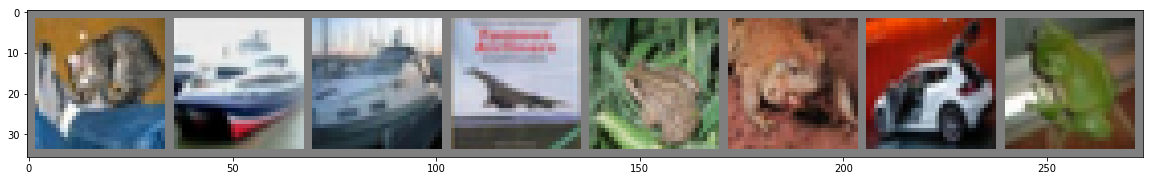

In [33]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:8]),)
outputs = model.forward(Variable(images))
predicted = torch.max(outputs.data, 1)[1]

In [34]:
binary_classes[predicted.numpy()[:8]]

array(['animal', 'vehicle', 'vehicle', 'vehicle', 'animal', 'animal',
       'vehicle', 'animal'], dtype='<U7')

### Convolutional weights

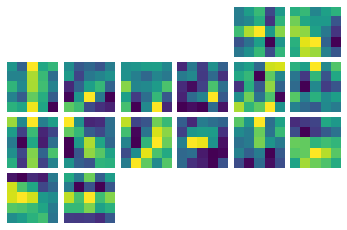

In [35]:
import torch
from matplotlib import pyplot as plt

def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,2*num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(2*num_rows,num_cols,i+1+tensor.shape[0])
        ax1.imshow(np.mean(tensor[i],0))
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
filters = model.modules
body_model = [i for i in model.children()]
conv1_weights = body_model[0].weight.data.numpy()
plot_kernels(conv1_weights)

<hr>

<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p><b>Optimize</b> the model in any way you can. You can change to the architecture of the model, vary the hyperparameters and add any of the many optimization techniques found in literature. </p>
</div>